In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from functions import plotting_fcts

# Die klimatische Wasserbilanz 

## Mikhail Ivanovich Budyko (20.01.1920 – 10.12.2001)

![SNOWFALL](Budyko.png)

[Image source](https://public.wmo.int/en/about-us/awards/international-meteorological-organization-imo-prize/mikhail-ivanovich-budyko)

In den Jahren 1955-1974 studierte Mikhail Budyko im Rahmen seiner Forschungen die Komponenten der Land- und Meeresenergiebilanz, was in Russland und darüber hinaus weithin anerkannt wurde und den Grundstein für einen neuen Bereich der Meteorologie legte - die physikalische Klimatologie (Theorie des Klimas). 

## Budyko nimmt an, dass die Wasserbilanz großer Einzugsgebiete (>>1000 km²) nur vom Klima kontrolliert wird…!
Die langfristiger Wasserbilanz für ein Einzugsgebiet ist dann:

$P = AET + Q$ (1)

Und die Energiebilanz ist:

$R_n = \lambda_w AET + H + G$ (2)

# Die klimatische Wasserbilanz 

Die klimatische Wasserbilanz ist definiert als $P - PET$.

Sie ist eng verwandt mit der sogenannten Aridität $\phi$.

$\phi = \frac{PET}{P}$

Gebiete, in denen $P$ größer als $PET$ ist, werden als Energie-limitiert bezeichnet. 
Gebiete, in denen $P$ kleiner als $PET$ ist, werden als Wasser-limitiert bezeichnet.

In Wasser-limitierten ist die klimatische Wasserbilanz negativ (bzw. $\phi > 1$).
In solchen Gebieten kann nicht alle Energie genutzt werden um Wasser zu verdunsten, da nicht genügend Wasser vorhanden ist. 
In Energie-limitierten Gebieten hingegen kann (fast) alle Energie genutzt werden ($PET = AET$), und folglich sollte $P - PET$ dem Abfluss $Q$ entsprechen.
Plottet man nun den Abfluss gegen die klimatische Wasserbilanz, so sieht man einen starken Zusammenhang, inbesondere in Energie-limitierten Gebieten, da hier $P - PET$ ungefähr $Q$ entsprechen sollte.



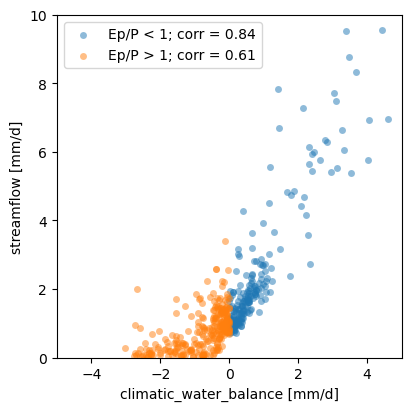

In [7]:
# load data
df = pd.read_csv("results/caravan_processed.csv")

df["aridity_class"] = 0
df.loc[df["aridity_netrad"] > 1, "aridity_class"] = 1
df["climatic_water_balance"] = df["total_precipitation_sum"] - df["netrad"]


fig = plt.figure(figsize=(4, 4), constrained_layout=True)
axes = plt.axes()
x_name = "climatic_water_balance"
y_name = "streamflow"
x_unit = " [mm/d]"
y_unit = " [mm/d]"
r_sp_energy_limited, _ = stats.spearmanr(df.loc[df["aridity_class"] == 0, x_name],
                                         df.loc[df["aridity_class"] == 0, y_name],
                                         nan_policy='omit')
im = axes.scatter(df.loc[df["aridity_class"] == 0, x_name], df.loc[df["aridity_class"] == 0, y_name],
                  s=25, c="tab:blue", alpha=0.5, lw=0,
                  label="Ep/P < 1; corr = " + str(np.round(r_sp_energy_limited,2)))
r_sp_water_limited, _ = stats.spearmanr(df.loc[df["aridity_class"] == 1, x_name],
                                        df.loc[df["aridity_class"] == 1, y_name],
                                        nan_policy='omit')
im = axes.scatter(df.loc[df["aridity_class"] == 1, x_name], df.loc[df["aridity_class"] == 1, y_name],
                  s=25, c="tab:orange", alpha=0.5, lw=0,
                  label="Ep/P > 1; corr = " + str(np.round(r_sp_water_limited,2)))
axes.set_xlabel(x_name + x_unit)
axes.set_ylabel(y_name + y_unit)
axes.set_xlim([-5, 5])
axes.set_ylim([0, 10])
#plotting_fcts.plot_origin_line(df[x_name], df[y_name])
#axes.set_xscale('log')
#axes.set_yscale('log')
axes.legend(loc='best')

%matplotlib inline

In [9]:
import ipywidgets as widgets

def f(x):
    
    fig = plt.figure(figsize=(6, 3), constrained_layout=True)
    axes = plt.axes()
    x_name = "aridity_netrad"
    y_name = "runoff_ratio"
    x_unit = " [-]"
    y_unit = " [-]"
    z_name = x #"frac_snow"
    z_unit = " [-]"
    im = axes.scatter(df[x_name], 1-df[y_name], s=25, c=df[z_name], alpha=0.5, lw=0) #, s=df["area"]/100
    axes.set_xlabel(x_name + x_unit)
    axes.set_ylabel(y_name + y_unit)
    axes.set_xlim([0, 5])
    axes.set_ylim([-0.25, 1.25])
    plotting_fcts.plot_Budyko_limits(df[x_name], df[y_name])
    #axes.set_xscale('log')
    cbar = fig.colorbar(im, ax=axes)
    cbar.set_label(z_name + z_unit)


widgets.interact(f, x=['frac_snow', 'seasonality', 'area', 'slp_dg_sav', 'gwt_cm_sav'])

%matplotlib inline

interactive(children=(Dropdown(description='x', options=('frac_snow', 'seasonality', 'area', 'slp_dg_sav', 'gw…